In [1]:
# Import pandas library
import pandas as pd

In [2]:
# Sample Data (Can be replaced with any real dataset)
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Edward', None],
    'Age': [25, None, 23, 25, 28, 30],
    'City': ['New York', 'Los Angeles', None, 'Chicago', 'Houston', 'Chicago'],
    'Salary': [50000, 54000, None, 62000, 58000, 60000],
    'Gender': ['F', 'M', 'M', 'M', None, 'F']
}

In [3]:
# Create DataFrame
df = pd.DataFrame(data)


In [4]:
# Display the DataFrame
print("Initial DataFrame:")
display(df)

Initial DataFrame:


,Name,Age,City,Salary,Gender
0,Alice,25.0,New York,50000.0,F
1,Bob,NaN,Los Angeles,54000.0,M
2,Charlie,23.0,None,NaN,M
3,David,25.0,Chicago,62000.0,M
4,Edward,28.0,Houston,58000.0,None
5,None,30.0,Chicago,60000.0,F


# 1. Data Inspection

In [5]:
# Get the first few rows of the DataFrame
print("Head of the DataFrame:")
display(df.head())

Head of the DataFrame:


,Name,Age,City,Salary,Gender
0,Alice,25.0,New York,50000.0,F
1,Bob,NaN,Los Angeles,54000.0,M
2,Charlie,23.0,None,NaN,M
3,David,25.0,Chicago,62000.0,M
4,Edward,28.0,Houston,58000.0,None


In [6]:
# Check the dimensions (rows, columns)
print("Shape:", df.shape)

Shape: (6, 5)


In [7]:
# Display column names
print("Columns:", df.columns)

Columns: Index(['Name', 'Age', 'City', 'Salary', 'Gender'], dtype='object')


In [8]:
# Display summary statistics (only numerical data)
print("Summary Statistics:")
display(df.describe())

Summary Statistics:


,Age,Salary
count,5.000000,5.000000
mean,26.200000,56800.000000
std,2.774887,4816.637832
min,23.000000,50000.000000
25%,25.000000,54000.000000
50%,25.000000,58000.000000
75%,28.000000,60000.000000
max,30.000000,62000.000000


In [9]:
# Display Data Types
print("Data Types:")
print(df.dtypes)


Data Types:
Name       object
Age       float64
City       object
Salary    float64
Gender     object
dtype: object


In [10]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Name      1
Age       1
City      1
Salary    1
Gender    1
dtype: int64


# 2. Handling Missing Values

In [11]:
# Drop rows with any missing values
df_dropped = df.dropna()
print("After Dropping Missing Values:")
display(df_dropped)

After Dropping Missing Values:


,Name,Age,City,Salary,Gender
0,Alice,25.0,New York,50000.0,F
3,David,25.0,Chicago,62000.0,M


In [13]:
# Fill missing values with default values
df_filled = df.fillna({
    'Name': 'Unknown',
    'Age': df['Age'].mean(),  # Fill with mean age
    'City': 'Unknown',
    'Salary': df['Salary'].median(),
    'Gender': 'Not Specified'
})
print("After Filling Missing Values:")
display(df_filled)

After Filling Missing Values:


,Name,Age,City,Salary,Gender
0,Alice,25.0,New York,50000.0,F
1,Bob,26.2,Los Angeles,54000.0,M
2,Charlie,23.0,Unknown,58000.0,M
3,David,25.0,Chicago,62000.0,M
4,Edward,28.0,Houston,58000.0,Not Specified
5,Unknown,30.0,Chicago,60000.0,F


# 3. Filtering and Selecting Data

In [14]:
# Filter rows where Age > 25
age_filter = df[df['Age'] > 25]
print("Filtered Data (Age > 25):")
display(age_filter)

Filtered Data (Age > 25):


,Name,Age,City,Salary,Gender
4,Edward,28.0,Houston,58000.0,None
5,None,30.0,Chicago,60000.0,F


In [15]:
# Select specific columns
selected_columns = df[['Name', 'City', 'Salary']]
print("Selected Columns:")
display(selected_columns)

Selected Columns:


,Name,City,Salary
0,Alice,New York,50000.0
1,Bob,Los Angeles,54000.0
2,Charlie,None,NaN
3,David,Chicago,62000.0
4,Edward,Houston,58000.0
5,None,Chicago,60000.0


# 4. Sorting and Ranking

In [16]:
# Sort by Salary in descending order
sorted_df = df.sort_values(by='Salary', ascending=False)
print("Sorted by Salary (Descending):")
display(sorted_df)

Sorted by Salary (Descending):


,Name,Age,City,Salary,Gender
3,David,25.0,Chicago,62000.0,M
5,None,30.0,Chicago,60000.0,F
4,Edward,28.0,Houston,58000.0,None
1,Bob,NaN,Los Angeles,54000.0,M
0,Alice,25.0,New York,50000.0,F
2,Charlie,23.0,None,NaN,M


In [17]:
# Rank salaries
df['Salary Rank'] = df['Salary'].rank(method='min', ascending=False)
print("Salary Rank:")
display(df)

Salary Rank:


,Name,Age,City,Salary,Gender,Salary Rank
0,Alice,25.0,New York,50000.0,F,5.0
1,Bob,NaN,Los Angeles,54000.0,M,4.0
2,Charlie,23.0,None,NaN,M,NaN
3,David,25.0,Chicago,62000.0,M,1.0
4,Edward,28.0,Houston,58000.0,None,3.0
5,None,30.0,Chicago,60000.0,F,2.0


# 5. Data Transformation

In [18]:
# Create a new column (e.g., Taxed Salary with 10% tax deduction)
df['Taxed Salary'] = df['Salary'] * 0.9
print("With Taxed Salary:")
display(df)

With Taxed Salary:


,Name,Age,City,Salary,Gender,Salary Rank,Taxed Salary
0,Alice,25.0,New York,50000.0,F,5.0,45000.0
1,Bob,NaN,Los Angeles,54000.0,M,4.0,48600.0
2,Charlie,23.0,None,NaN,M,NaN,NaN
3,David,25.0,Chicago,62000.0,M,1.0,55800.0
4,Edward,28.0,Houston,58000.0,None,3.0,52200.0
5,None,30.0,Chicago,60000.0,F,2.0,54000.0


In [19]:
# Apply a function to a column (e.g., Convert Age to categories)
df['Age Group'] = df['Age'].apply(lambda x: 'Youth' if x < 26 else 'Adult')
print("Age Group:")
display(df)

Age Group:


,Name,Age,City,Salary,Gender,Salary Rank,Taxed Salary,Age Group
0,Alice,25.0,New York,50000.0,F,5.0,45000.0,Youth
1,Bob,NaN,Los Angeles,54000.0,M,4.0,48600.0,Adult
2,Charlie,23.0,None,NaN,M,NaN,NaN,Youth
3,David,25.0,Chicago,62000.0,M,1.0,55800.0,Youth
4,Edward,28.0,Houston,58000.0,None,3.0,52200.0,Adult
5,None,30.0,Chicago,60000.0,F,2.0,54000.0,Adult


# 6. Grouping and Aggregation

In [20]:
# Group by City and get average Salary
grouped_df = df.groupby('City')['Salary'].mean().reset_index()
print("Average Salary by City:")
display(grouped_df)

Average Salary by City:


,City,Salary
0,Chicago,61000.0
1,Houston,58000.0
2,Los Angeles,54000.0
3,New York,50000.0


In [21]:
# Aggregate multiple statistics
agg_df = df.groupby('Gender').agg({
    'Age': ['mean', 'max'],
    'Salary': ['mean', 'sum']
}).reset_index()
print("Aggregated Data by Gender:")
display(agg_df)

Aggregated Data by Gender:


Gender   Age         Salary          
          mean   max     mean       sum
0      F  27.5  30.0  55000.0  110000.0
1      M  24.0  25.0  58000.0  116000.0

# 7. Merging, Joining, and Concatenating

In [22]:
# Create another DataFrame for merging
df_new = pd.DataFrame({
    'Name': ['Alice', 'Charlie', 'Edward'],
    'Bonus': [5000, 7000, 6000]
})

In [23]:
# Merge on 'Name' column
merged_df = pd.merge(df, df_new, on='Name', how='left')
print("Merged DataFrame:")
display(merged_df)

Merged DataFrame:


,Name,Age,City,Salary,Gender,Salary Rank,Taxed Salary,Age Group,Bonus
0,Alice,25.0,New York,50000.0,F,5.0,45000.0,Youth,5000.0
1,Bob,NaN,Los Angeles,54000.0,M,4.0,48600.0,Adult,NaN
2,Charlie,23.0,None,NaN,M,NaN,NaN,Youth,7000.0
3,David,25.0,Chicago,62000.0,M,1.0,55800.0,Youth,NaN
4,Edward,28.0,Houston,58000.0,None,3.0,52200.0,Adult,6000.0
5,None,30.0,Chicago,60000.0,F,2.0,54000.0,Adult,NaN


In [24]:
# Concatenate rows of two DataFrames
concatenated_df = pd.concat([df, df_new], axis=0, ignore_index=True)
print("Concatenated DataFrame:")
display(concatenated_df)

Concatenated DataFrame:


,Name,Age,City,Salary,Gender,Salary Rank,Taxed Salary,Age Group,Bonus
0,Alice,25.0,New York,50000.0,F,5.0,45000.0,Youth,NaN
1,Bob,NaN,Los Angeles,54000.0,M,4.0,48600.0,Adult,NaN
2,Charlie,23.0,None,NaN,M,NaN,NaN,Youth,NaN
3,David,25.0,Chicago,62000.0,M,1.0,55800.0,Youth,NaN
4,Edward,28.0,Houston,58000.0,None,3.0,52200.0,Adult,NaN
5,None,30.0,Chicago,60000.0,F,2.0,54000.0,Adult,NaN
6,Alice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0
7,Charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7000.0
8,Edward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000.0


# 8. Handling Duplicates

In [25]:
# Check for duplicates
print("Duplicates Found:")
print(df.duplicated())

Duplicates Found:
0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool


In [26]:
# Drop duplicate rows
df_no_duplicates = df.drop_duplicates()
print("After Dropping Duplicates:")
display(df_no_duplicates)

After Dropping Duplicates:


,Name,Age,City,Salary,Gender,Salary Rank,Taxed Salary,Age Group
0,Alice,25.0,New York,50000.0,F,5.0,45000.0,Youth
1,Bob,NaN,Los Angeles,54000.0,M,4.0,48600.0,Adult
2,Charlie,23.0,None,NaN,M,NaN,NaN,Youth
3,David,25.0,Chicago,62000.0,M,1.0,55800.0,Youth
4,Edward,28.0,Houston,58000.0,None,3.0,52200.0,Adult
5,None,30.0,Chicago,60000.0,F,2.0,54000.0,Adult


# 9. Encoding Categorical Variables

In [27]:
# One-hot encode the 'City' column
encoded_df = pd.get_dummies(df, columns=['City'], drop_first=True)
print("One-Hot Encoded DataFrame:")
display(encoded_df)

One-Hot Encoded DataFrame:


,Name,Age,Salary,Gender,Salary Rank,Taxed Salary,Age Group,City_Houston,City_Los Angeles,City_New York
0,Alice,25.0,50000.0,F,5.0,45000.0,Youth,False,False,True
1,Bob,NaN,54000.0,M,4.0,48600.0,Adult,False,True,False
2,Charlie,23.0,NaN,M,NaN,NaN,Youth,False,False,False
3,David,25.0,62000.0,M,1.0,55800.0,Youth,False,False,False
4,Edward,28.0,58000.0,None,3.0,52200.0,Adult,True,False,False
5,None,30.0,60000.0,F,2.0,54000.0,Adult,False,False,False


In [28]:
# Label encode the 'Gender' column (M: 1, F: 0)
df['Gender_Encoded'] = df['Gender'].apply(lambda x: 1 if x == 'M' else 0)
print("Label Encoded Gender:")
display(df)

Label Encoded Gender:


,Name,Age,City,Salary,Gender,Salary Rank,Taxed Salary,Age Group,Gender_Encoded
0,Alice,25.0,New York,50000.0,F,5.0,45000.0,Youth,0
1,Bob,NaN,Los Angeles,54000.0,M,4.0,48600.0,Adult,1
2,Charlie,23.0,None,NaN,M,NaN,NaN,Youth,1
3,David,25.0,Chicago,62000.0,M,1.0,55800.0,Youth,1
4,Edward,28.0,Houston,58000.0,None,3.0,52200.0,Adult,0
5,None,30.0,Chicago,60000.0,F,2.0,54000.0,Adult,0


# 10. Saving and Loading Data

In [29]:
# Save DataFrame to CSV
df.to_csv('processed_data.csv', index=False)
print("Data saved to 'processed_data.csv'.")

Data saved to 'processed_data.csv'.


In [30]:
# Load DataFrame from CSV
loaded_df = pd.read_csv('processed_data.csv')
print("Loaded DataFrame from 'processed_data.csv':")
display(loaded_df)

Loaded DataFrame from 'processed_data.csv':


,Name,Age,City,Salary,Gender,Salary Rank,Taxed Salary,Age Group,Gender_Encoded
0,Alice,25.0,New York,50000.0,F,5.0,45000.0,Youth,0
1,Bob,NaN,Los Angeles,54000.0,M,4.0,48600.0,Adult,1
2,Charlie,23.0,NaN,NaN,M,NaN,NaN,Youth,1
3,David,25.0,Chicago,62000.0,M,1.0,55800.0,Youth,1
4,Edward,28.0,Houston,58000.0,NaN,3.0,52200.0,Adult,0
5,NaN,30.0,Chicago,60000.0,F,2.0,54000.0,Adult,0


# 11. Pivot Tables and Crosstabs

In [31]:
# Create a pivot table to analyze average Salary by Gender and City
pivot_table = pd.pivot_table(df, values='Salary', index='Gender', columns='City', aggfunc='mean')
print("Pivot Table:")
display(pivot_table)

Pivot Table:


City,Chicago,Los Angeles,New York
Gender,,,
F,60000.0,NaN,50000.0
M,62000.0,54000.0,NaN


In [32]:
# Create a crosstab of Age Group and Gender
crosstab = pd.crosstab(df['Age Group'], df['Gender'], dropna=True)
print("Crosstab:")
display(crosstab)

Crosstab:


Gender,F,M
Age Group,,
Adult,1,1
Youth,1,2


# 12. Visualization with Pandas

<Axes: title={'center': 'Age Distribution'}, ylabel='Frequency'>

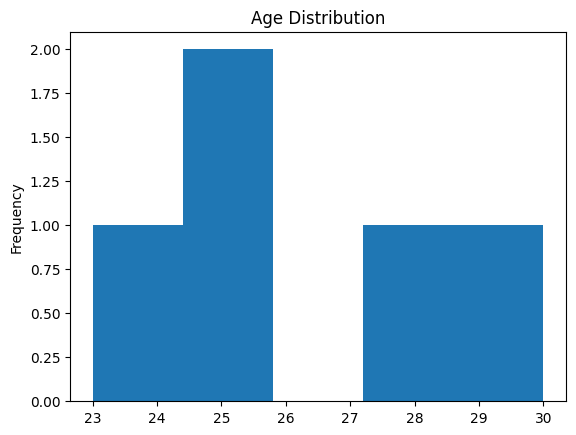

In [33]:
# Plot a histogram of the 'Age' column
df['Age'].plot(kind='hist', title='Age Distribution', bins=5)

<Axes: title={'center': 'Average Salary by City'}, xlabel='City'>

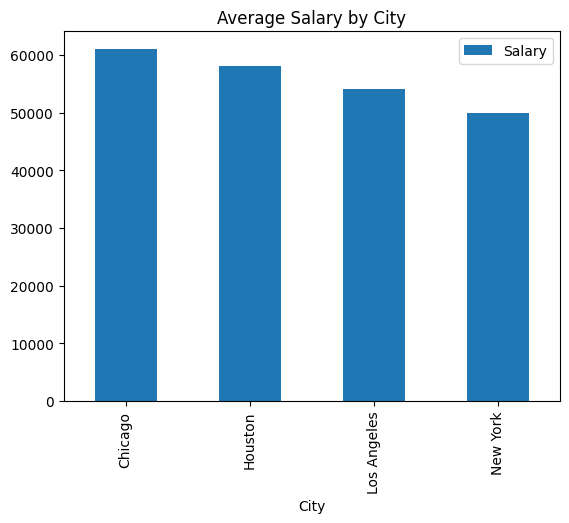

In [34]:
# Plot a bar chart for average Salary by City
grouped_df.plot(kind='bar', x='City', y='Salary', title='Average Salary by City')